In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes

In [98]:
df = pd.read_csv("../data/benin-malanville.csv")
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [99]:
print("Showing columns with more than 5% missing values:")

sum_of_na = df.isna().sum()
na_in_percent = (sum_of_na / len(df)) * 100
five_percent = na_in_percent[na_in_percent>5]
print(five_percent)

Showing columns with more than 5% missing values:
Comments    100.0
dtype: float64


In [100]:
print("Checking for Outliers using Z-Score and flagging them:")

columns = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
z_score = (df[columns] - df[columns].mean())/df[columns].std()
df['is_outlier'] = (abs(z_score) > 3).any(axis=1)
print(df.loc[df["is_outlier"], ["is_outlier"]])

Checking for Outliers using Z-Score and flagging them:
        is_outlier
670           True
671           True
672           True
673           True
674           True
...            ...
525141        True
525142        True
525143        True
525151        True
525155        True

[7740 rows x 1 columns]


In [101]:
print("Cleaning Data by removing columns with all NaNs and filling others with median values:")

df_clean = df.copy()
df_clean["Timestamp"] = pd.to_datetime(df_clean["Timestamp"], errors="coerce")
all_columns = list(df_clean.columns)

for col in all_columns:
    na_percentage = (df_clean[col].isna().sum() / len(df)) * 100

    if na_percentage > 80:
        df_clean.drop(columns=[col], inplace=True)
    else:
        median_value = df_clean[col].median()
        df_clean.fillna({col: median_value}, inplace=True)

df_clean.isna().sum()

df_clean.to_csv("../data/benin_clean.csv", index=False)

Cleaning Data by removing columns with all NaNs and filling others with median values:


Line Chart of GHI, DNI, DHI, Tamb over Time


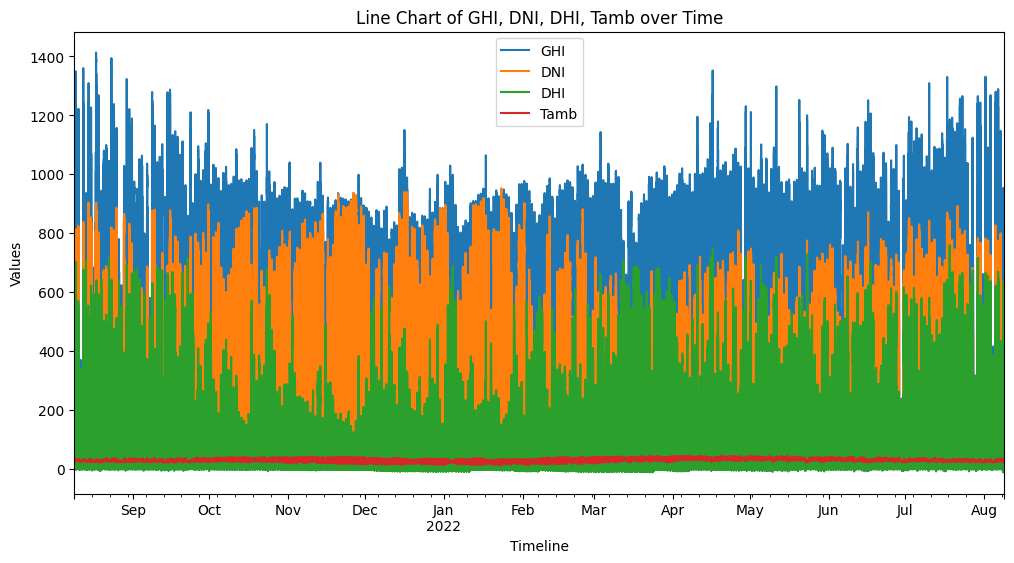

In [105]:
print("Line Chart of GHI, DNI, DHI, Tamb over Time")

columns_to_plot = ["GHI", "DNI", "DHI", "Tamb"]
df_clean[columns_to_plot].plot(figsize=(12, 6))
plt.xlabel("Timeline")
plt.ylabel("Values")
plt.title("Line Chart of GHI, DNI, DHI, Tamb over Time")
plt.legend(columns_to_plot)
plt.show()

Bar Chart of Average ModA & ModB Pre/Post Cleaning
                  ModA        ModB
is_outlier                        
False       232.393310  225.026584
True        517.343618  486.943256


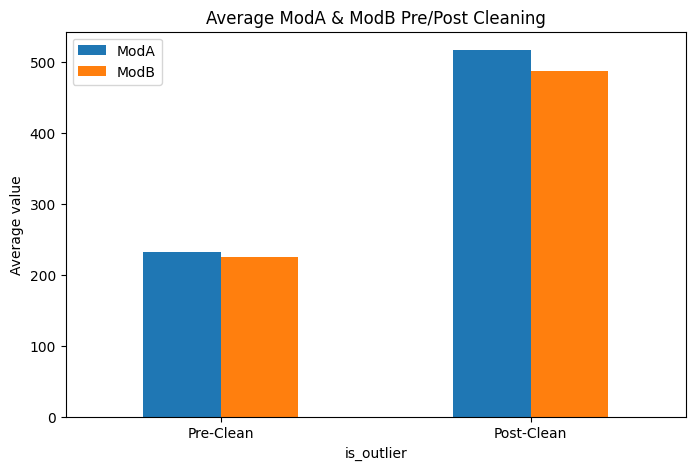

In [127]:
print("Bar Chart of Average ModA & ModB Pre/Post Cleaning")

grouped = df_clean.groupby("is_outlier")[["ModA", "ModB"]].mean()
print(grouped)
grouped.plot(kind="bar", figsize=(8, 5))
plt.ylabel("Average value")
plt.title("Average ModA & ModB Pre/Post Cleaning") #Pre clean is False , Post clean is True
plt.xticks([0, 1], ["Pre-Clean", "Post-Clean"], rotation=0)
plt.show()

Heatmap of Correlation


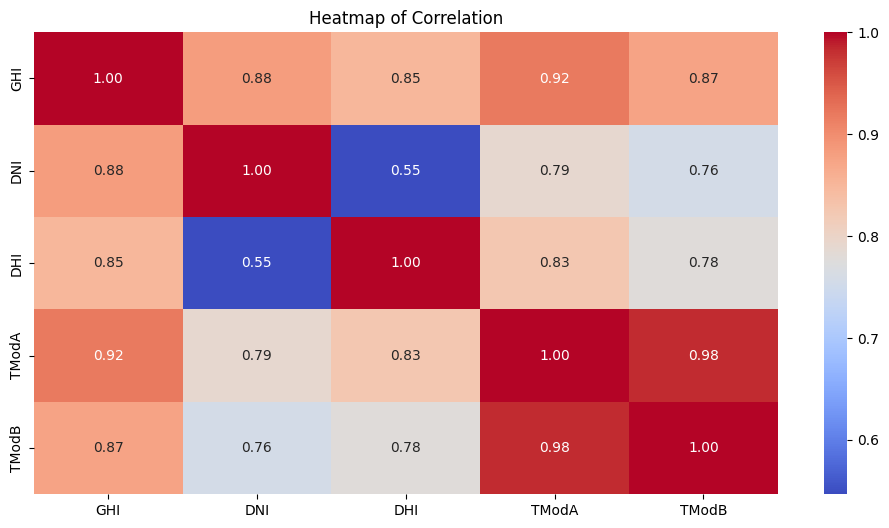

In [129]:
print("Heatmap of Correlation")
columns_to_plot = ["GHI", "DNI", "DHI", "TModA", "TModB"]

corr_matrix = df_clean[columns_to_plot].corr()
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap of Correlation")
plt.show()

Scatter Plot of WS, WSgust, WD vs GHI


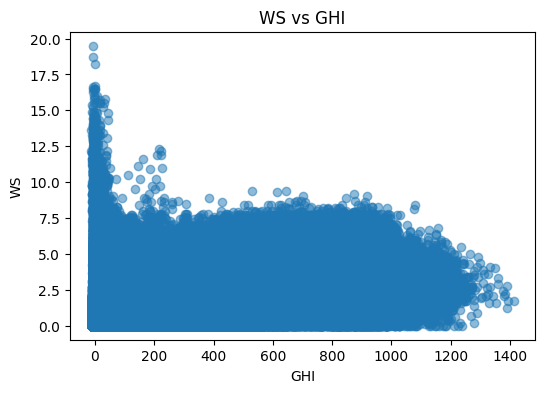

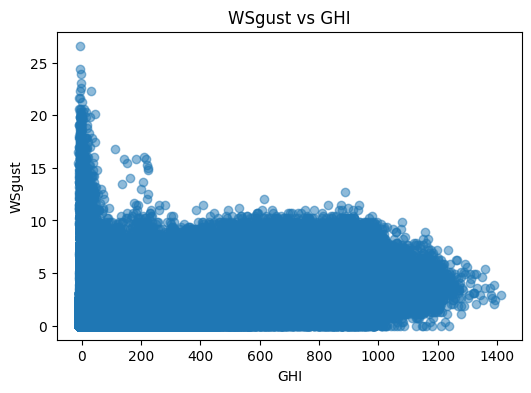

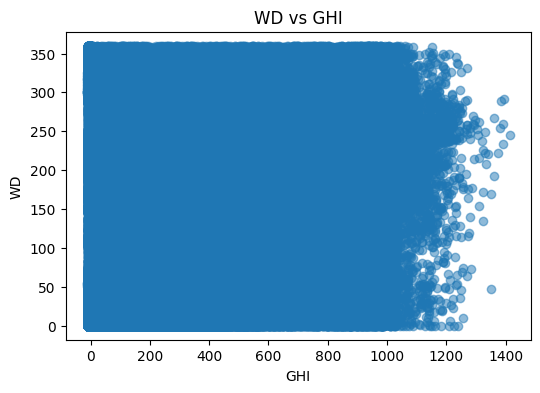

In [134]:
print("Scatter Plot of WS, WSgust, WD vs GHI")
columns_to_plot = ["WS", "WSgust", "WD"]
target = "GHI"

df_clean[target].describe()

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_clean[target], df_clean[col], alpha=0.5)
    plt.xlabel(target)
    plt.ylabel(col)
    plt.title(f"{col} vs {target}")
    plt.show()

Scatter Plot of RH vs GHI


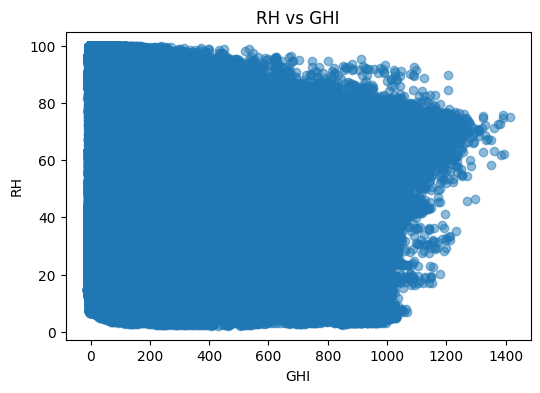

In [135]:
print("Scatter Plot of RH vs GHI")

columns_to_plot = ["RH"]
target = "GHI"

df_clean[target].describe()

for col in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_clean[target], df_clean[col], alpha=0.5)
    plt.xlabel(target)
    plt.ylabel(col)
    plt.title(f"{col} vs {target}")
    plt.show()

Wind Speed and Wind Direction plot


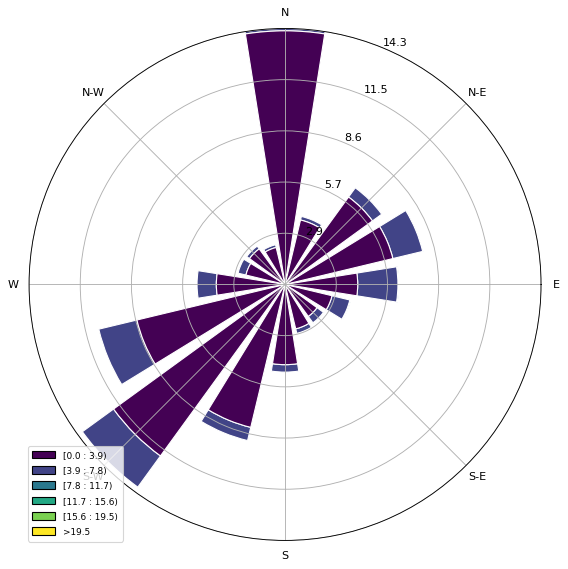

In [137]:
print("Wind Speed and Wind Direction plot")

ax = WindroseAxes.from_ax()
ax.bar(df["WD"], df["WS"], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()
plt.show()

Histogram of GHI and DNI


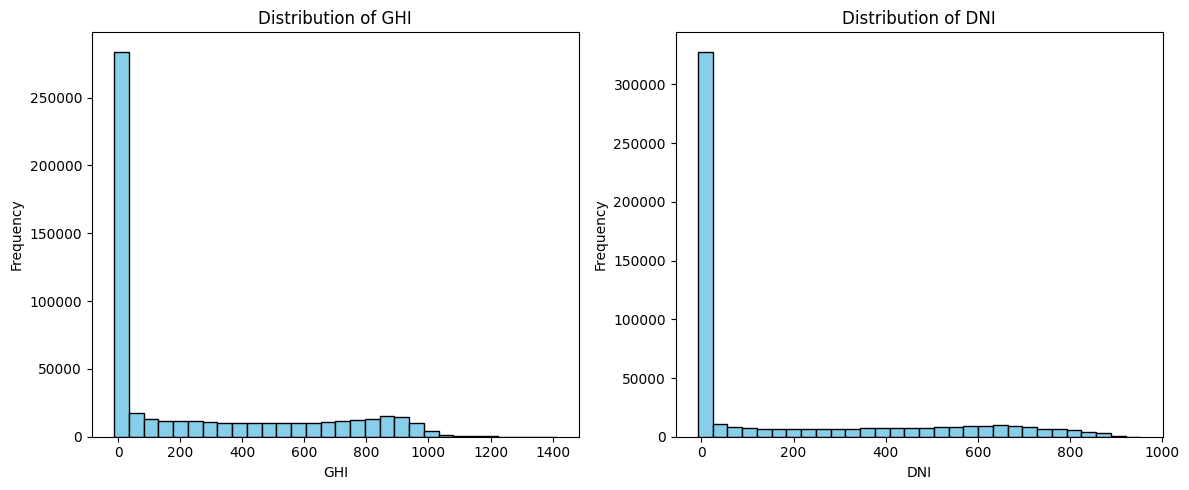

In [138]:
print("Histogram of GHI and DNI")

columns_to_plot = ["GHI", "DNI"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, col in enumerate(columns_to_plot):
    axes[i].hist(df_clean[col].dropna(), bins=30, color="skyblue", edgecolor="black")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Temperature Analysis


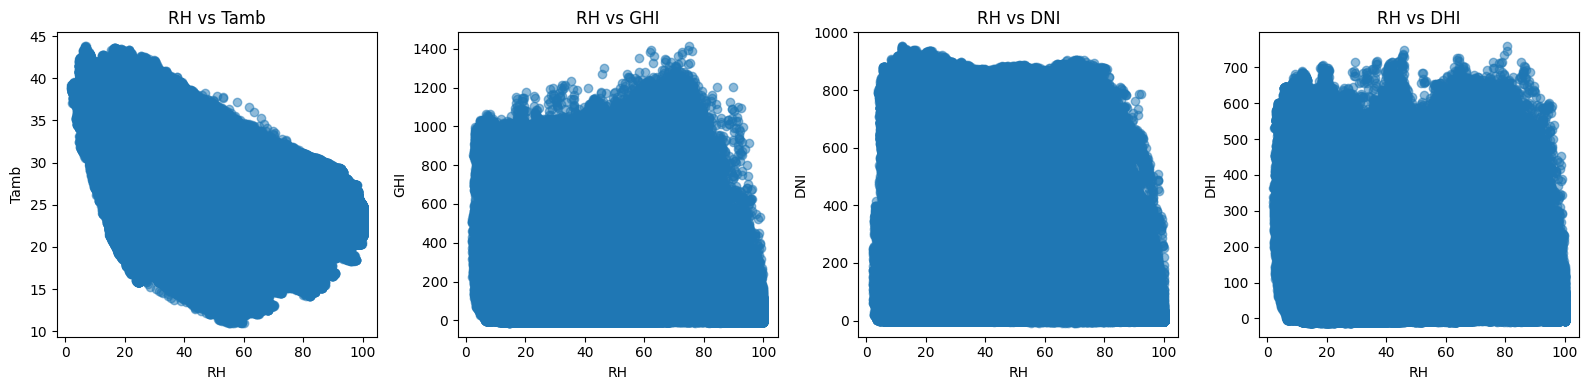

In [140]:
print("Temperature Analysis")

variables = ["Tamb", "GHI", "DNI", "DHI"]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, var in enumerate(variables):
    axes[i].scatter(df_clean["RH"], df_clean[var], alpha=0.5)
    axes[i].set_xlabel("RH")
    axes[i].set_ylabel(var)
    axes[i].set_title(f"RH vs {var}")

plt.tight_layout()
plt.show()

Bubble Chart of GHI vs Tamb with RH as bubble size


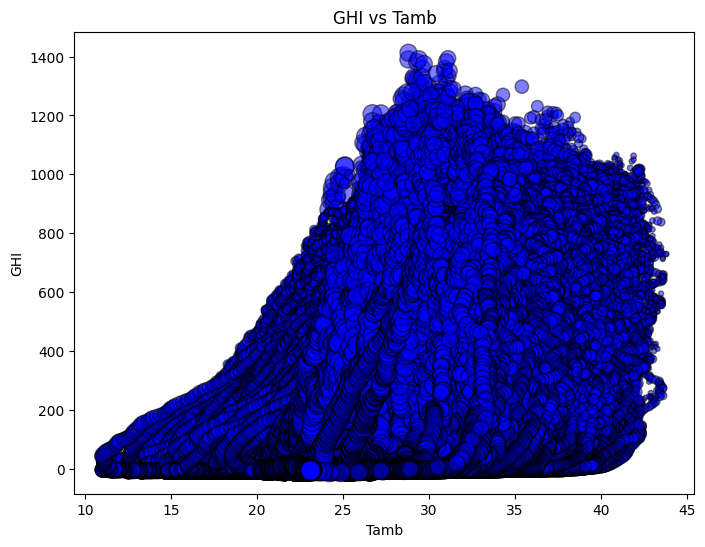

In [141]:
print("Bubble Chart of GHI vs Tamb with RH as bubble size")

plt.figure(figsize=(8, 6))
plt.scatter(
    df["Tamb"], 
    df["GHI"],  
    s=df["RH"] * 2,  
    alpha=0.5,
    c="blue",  
    edgecolor="k",  
)
plt.xlabel("Tamb")
plt.ylabel("GHI")
plt.title("GHI vs Tamb")
plt.show()